**Import Necessary Libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

**Load Data**

Dataset Comprises of two files. One is "img", which includes all the images of Numbers and Alphabets. Other is "label.csv", which includes the label for each image.

In [3]:
# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/label.csv")

# Display first few rows
print(df.head())

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


In [10]:
from PIL import Image  # Use PIL for image processing
# Path to the image folder
image_folder = "/content/drive/MyDrive"

In [11]:
# Define image dimensions (resize for uniformity)
IMG_WIDTH, IMG_HEIGHT = 28, 28

# Lists to store images and labels
images = []
labels = []

# Load images from the folder
for index, row in tqdm(df.iterrows()):
    img_path = os.path.join(image_folder, row['image'])
    img = Image.open(img_path).convert("L")  # Convert to grayscale  # Read as grayscale
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))  # Resize to fixed size
    img = np.array(img)  # Convert to NumPy array
    images.append(img)
    labels.append(row['label'])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values (0-255 → 0-1)
images = images / 255.0

# Reshape images for CNN input (Add channel dimension)
images = images.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)

# Print shape of dataset
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")


0it [00:00, ?it/s]

Images shape: (3410, 28, 28, 1), Labels shape: (3410,)


**Visualize Sample Images**

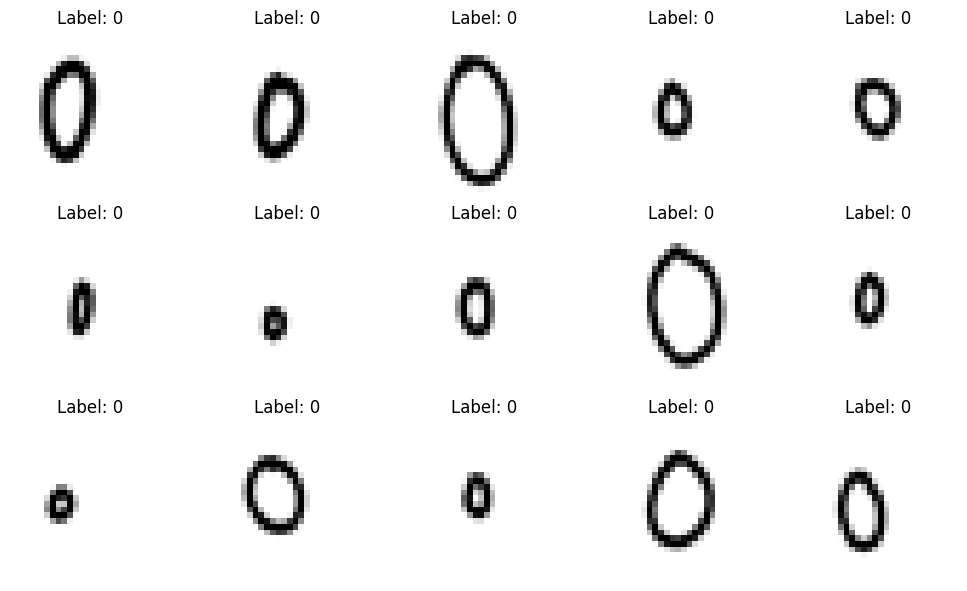

In [12]:
# Display some images with labels
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    axes[i].imshow(images[i].reshape(IMG_WIDTH, IMG_HEIGHT), cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

**Preprocess the Data**

In [14]:
from sklearn.preprocessing import LabelEncoder
# Encode labels into numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_onehot = to_categorical(labels_encoded)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels_onehot, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Train images: {X_train.shape}, Train labels: {y_train.shape}")
print(f"Test images: {X_test.shape}, Test labels: {y_test.shape}")

Train images: (2728, 28, 28, 1), Train labels: (2728, 62)
Test images: (682, 28, 28, 1), Test labels: (682, 62)


**Build the CNN Model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.0203 - loss: 4.1378 - val_accuracy: 0.0528 - val_loss: 4.0898
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0597 - loss: 4.0053 - val_accuracy: 0.1672 - val_loss: 3.5043
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.1495 - loss: 3.3749 - val_accuracy: 0.3475 - val_loss: 2.7568
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2387 - loss: 2.8261 - val_accuracy: 0.4677 - val_loss: 2.2335
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3472 - loss: 2.4013 - val_accuracy: 0.5264 - val_loss: 1.9648
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4014 - loss: 2.1252 - val_accuracy: 0.5821 - val_loss: 1.6830
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4630 - loss: 1.9006 - val_accuracy: 0.6349 - val_loss: 1.5014
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5026 - loss: 1.7061 - val_accuracy: 0.6510 - v

**Evaluate the Model**

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7059 - loss: 0.9695
Test Accuracy: 0.7361


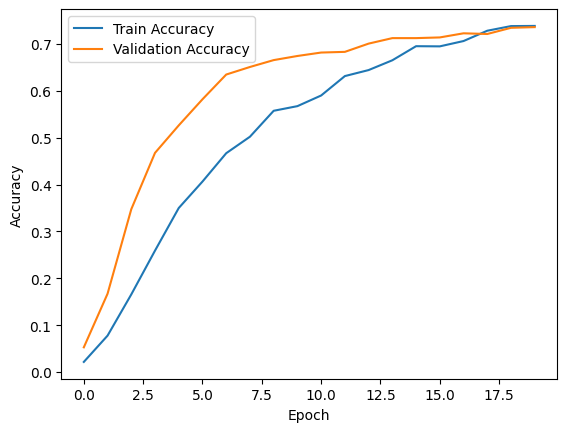

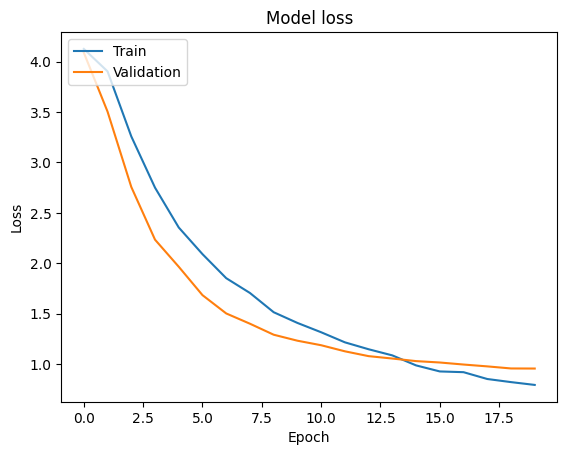

In [23]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Save the Model**

In [25]:
model.save("handwritten_character_model.keras")